# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?


1-3 on GitHub
4. Yes for the median, a non-decreasing transformation will keep the position of the median in the distribution. The median of g(X) would be g(median(X)), and the median of the transformed variable is the transformed median of the original variable. This would also apply to other quantiles, including the IQR, as it doesn't affect the values' order. The range however could be affected by a non-decreasing transformation.
5. No it is not always true. A non-decreasing transformation preserves the order but it doesn't always preserve the mean.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [2]:
import pandas as pd
df = pd.read_csv("ForeignGifts_edu.csv")

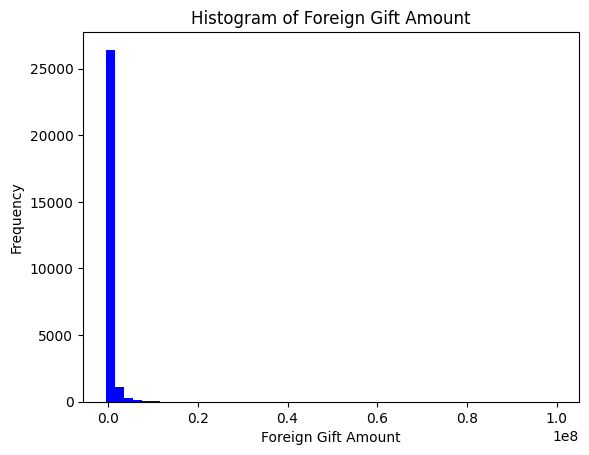

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [6]:
#2:
import matplotlib.pyplot as plt
plt.hist(df['Foreign Gift Amount'], bins=50, color='blue')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()
df['Foreign Gift Amount'].describe()

#Findings:

Findings: the standard deviation shows that there is a lot of variability in the foreign gift amounts. The minimum being a negative could indicate some type of error in the dataset. The fact that the max value is that large may mean that some gifts were considerably larger than others. The mean foreign gift amount is much larger than the 25th and 50th percentiles, showing a positive skew.

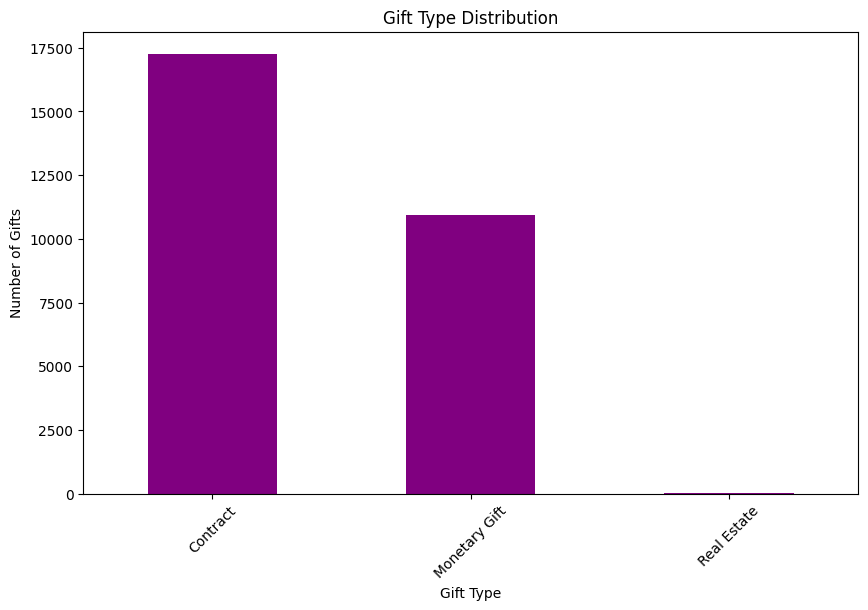

,count
Gift Type,
Contract,0.612097
Real Estate,0.000390
Monetary Gift,0.387513


In [8]:
#3:
#Value counts table for Gift Type
gift_type_counts = df['Gift Type'].value_counts()

#Bar chart
plt.figure(figsize=(10, 6))
gift_type_counts.plot(kind='bar', color='purple')
plt.title('Gift Type Distribution')
plt.xlabel('Gift Type')
plt.ylabel('Number of Gifts')
plt.xticks(rotation=45)
plt.show()

#Proportion of contracts, real estate, and monetary gifts
gift_type_proportions = gift_type_counts / gift_type_counts.sum()
gift_type_proportions[['Contract', 'Real Estate', 'Monetary Gift']]

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-54d853687bd4>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log Foreign Gift Amount'], shade=True, color='blue')


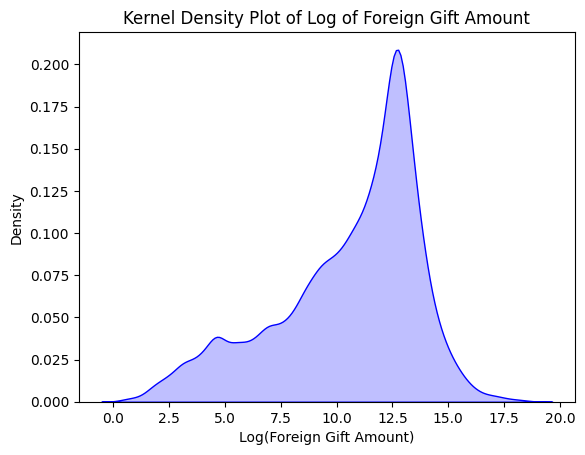

In [9]:
#4a:
import seaborn as sns
import numpy as np

#Kernel density plot:
df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'] + 1)  # Adding 1 to avoid log(0)


sns.kdeplot(df['Log Foreign Gift Amount'], shade=True, color='blue')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()


<ipython-input-10-56e1bbad4c97>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)


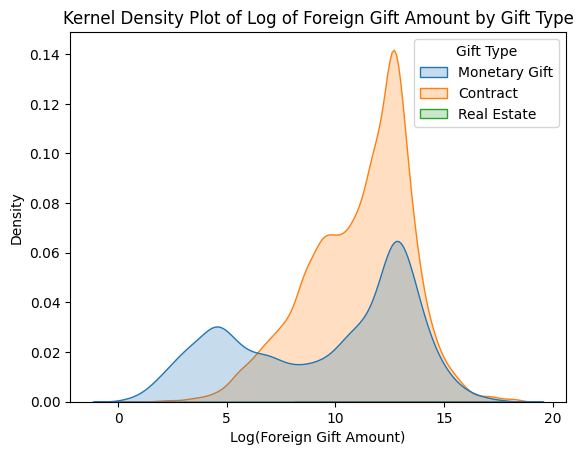

In [10]:
#4b:
# Kernel density plot with gift type
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()

In [17]:
#5a:
#Number of Gifts:
top_15_countries_gifts = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15) #country of giftor is label in spreadsheet
top_15_countries_gifts


,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [18]:
#5b
#Total Amount Given:
top_15_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
top_15_countries_amount

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


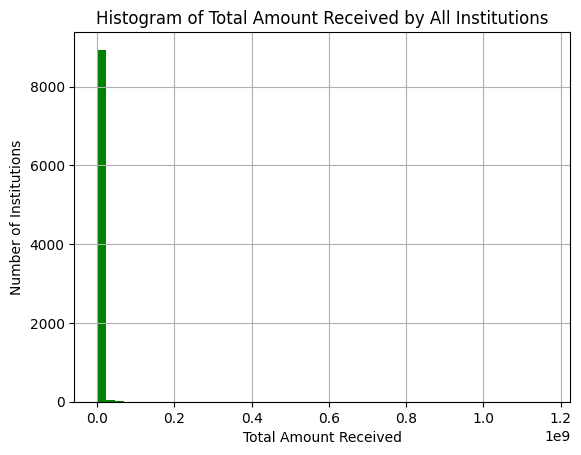

In [27]:
#6:
top_15_institutions_amount = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15) #Giftor Name is label in spreadsheet
print(top_15_institutions_amount)

df.groupby('Giftor Name')['Foreign Gift Amount'].sum().hist(bins=50, color='green')
plt.title('Histogram of Total Amount Received by All Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.show()


In [24]:
#7:
top_giftors_by_amount = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
top_giftors_by_amount


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [29]:
import pandas as pd
df = pd.read_csv("drilling_rigs.csv")

In [31]:
#1:
print(df.head())
print("Number of observations: {df.shape[0]}")
print("Number of variables: {df.shape[1]}")
print(df.dtypes)

#The month column would need to become a datetime variable. Also there are several parts where it indicates the data is Not Available, meaning that some columns may be being read as an object or string and need to be converted to numeric

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

In [32]:
#2
df['time'] = pd.to_datetime(df['Month'], format='mixed')
print(df['time'].head())

0   1973-01-01
1   1973-02-01
2   1973-03-01
3   1973-04-01
4   1973-05-01
Name: time, dtype: datetime64[ns]


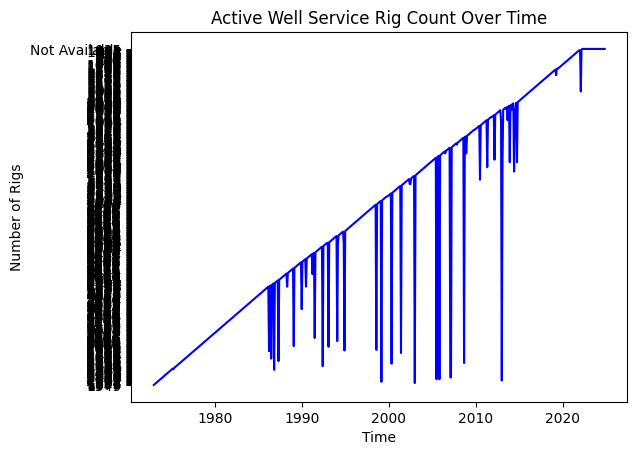

In [35]:
#3:
import matplotlib.pyplot as plt

# Plot the 'Active Well Service Rig Count (Number of Rigs)' column over time
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], color='blue')
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

#Number of rigs is increasing over time but seem to have some interesting fluctuations almost every 10 years

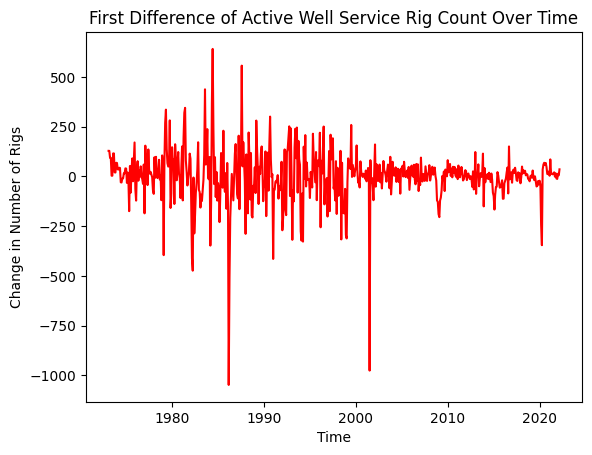

In [38]:
#4:
# Converting the column to numeric
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# Difference of the 'Active Well Service Rig Count (Number of Rigs)'
df['rig_count_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.plot(df['time'], df['rig_count_diff'], color='red')
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.show()

#Shows a lot of activity in around the 1970s-1980s and steadying over time (with another large spike in early 2000s)

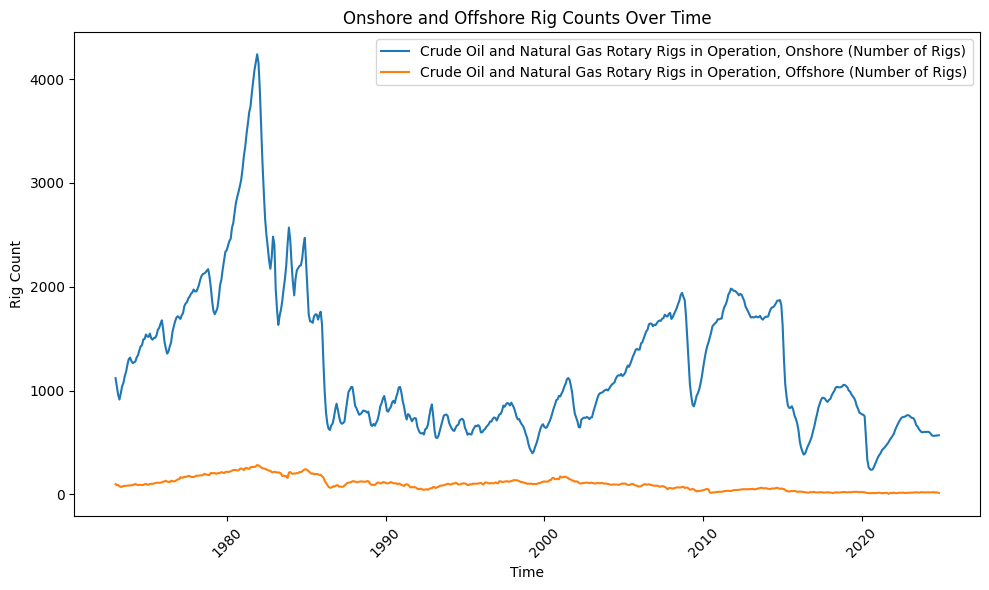

In [50]:
#5:

df_melted = df.melt(
    id_vars=['time'],
    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],  # Replace with actual column names
    var_name='Rig Type',
    value_name='Rig Count'
)


plt.figure(figsize=(10, 6))
for rig_type in df_melted['Rig Type'].unique():
    subset = df_melted[df_melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Rig Count'], label=rig_type)

plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Rig Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()